In [59]:
import pandas as pd 

import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.set()

In [4]:
data = pd.read_excel("../data/raw/DataNuuksioPallasYllas.xlsx")

In [6]:
counter_ids = [
    912,
    1043,
    1050,
    1225,
    922,
    1246
]

In [49]:
counters = data[data['CounterID_ASTA'].isin(counter_ids)]
print(counters.columns)
counters = counters[['CounterID_ASTA', 'StartTime', 'EndTime', 'Visits', 'PAVE_Counters.CoordinateNorth', 'PAVE_Counters.CoordinateEast']]

Index(['CounterReadingID', 'CounterID_ASTA', 'SequenceNumber', 'StartTime',
       'EndTime', 'Visits', 'ASTA_Counters.CounterID_PAVE',
       'ASTA_Counters.Name_ASTA', 'ASTA_Counters.InstallationDate',
       'ASTA_Counters.NationalParkCode', 'ASTA_Counters.Municipality',
       'ASTA_Counters.RegionalUnit', 'ASTA_Counters.RegionalEntity',
       'PAVE_Counters.Globalid', 'PAVE_Counters.Name', 'PAVE_Counters.Manager',
       'PAVE_Counters.AdditionalInfo', 'PAVE_Counters.CoordinateNorth',
       'PAVE_Counters.CoordinateEast'],
      dtype='object')


In [50]:
counters = counters[(counters['StartTime'] > '2017')]
counters = counters[counters['Visits'] < 50]

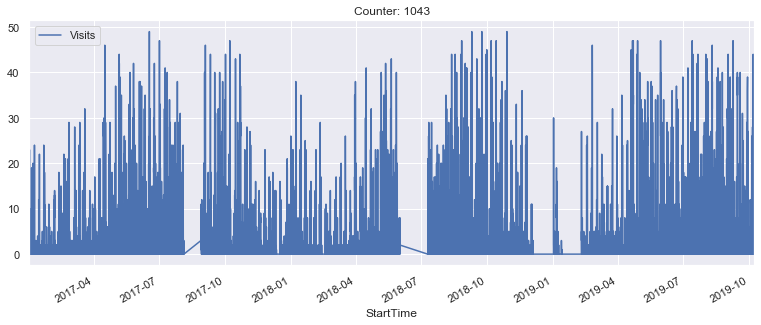

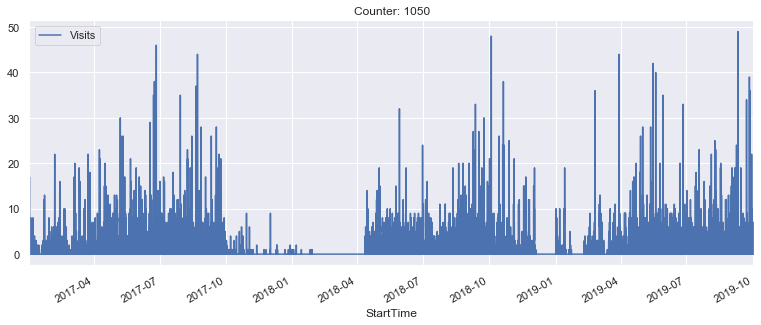

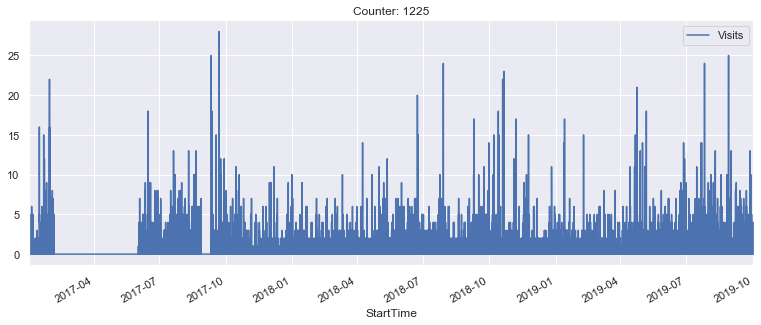

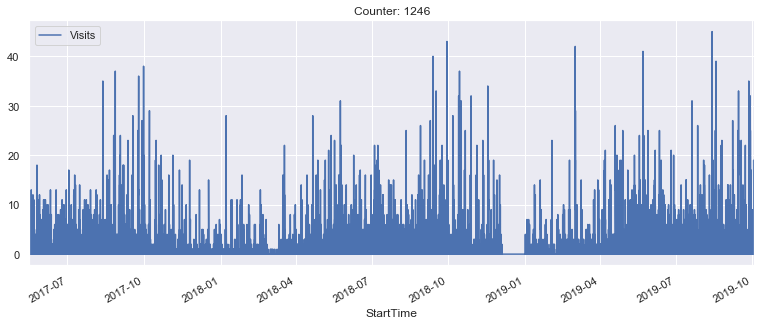

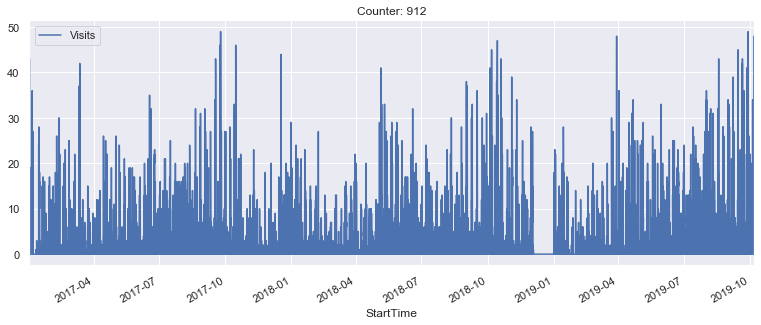

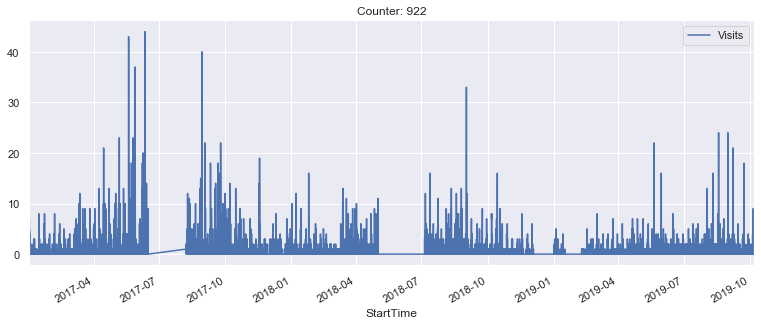

In [54]:
for _id in counters['CounterID_ASTA'].unique():
    counters[counters['CounterID_ASTA'] == _id].plot(x='StartTime', y='Visits', figsize=(13,5))
    plt.title('Counter: {}'.format(_id))
    plt.show()

In [73]:
sensor = counters[counters['CounterID_ASTA'] == counter_ids[0]]
sensor.head()

,CounterID_ASTA,StartTime,EndTime,Visits,PAVE_Counters.CoordinateNorth,PAVE_Counters.CoordinateEast
289130,912,2017-01-01 01:00:00,2017-01-01 02:00:00,0,6690448.0,361700.0
289131,912,2017-01-01 02:00:00,2017-01-01 03:00:00,0,6690448.0,361700.0
289132,912,2017-01-01 03:00:00,2017-01-01 04:00:00,0,6690448.0,361700.0
289133,912,2017-01-01 04:00:00,2017-01-01 05:00:00,0,6690448.0,361700.0
289134,912,2017-01-01 05:00:00,2017-01-01 06:00:00,0,6690448.0,361700.0


In [110]:
import numpy as np
import statsmodels

In [120]:
sensor_counts = sensor[['StartTime', 'Visits']].set_index('StartTime')
sensor_counts = sensor_counts.Visits.replace(0, 1)
print(sensor_counts)
res = statsmodels.tsa.seasonal.seasonal_decompose(sensor_counts, model='additive', freq=1)

StartTime
2017-01-01 01:00:00    1
2017-01-01 02:00:00    1
2017-01-01 03:00:00    1
2017-01-01 04:00:00    1
2017-01-01 05:00:00    1
                      ..
2019-10-03 19:00:00    3
2019-10-04 07:00:00    3
2019-10-04 14:00:00    3
2019-10-06 09:00:00    3
2019-10-06 18:00:00    3
Name: Visits, Length: 23518, dtype: int64


[]

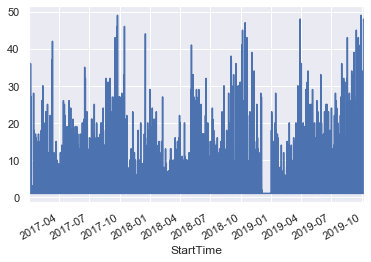

In [121]:
res.trend.plot()
plt.plot()

[]

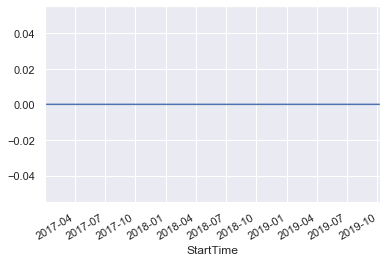

In [122]:
res.seasonal.plot()
plt.plot()

## Weather 

In [128]:
df_weather2017 = pd.read_csv('../data/raw/Nuuksio-2017.csv', parse_dates={'Date': [0, 1, 2, 3]})
df_weather2018 = pd.read_csv('../data/raw/Nuuksio-2018.csv', parse_dates={'Date': [0, 1, 2, 3]})
df_weather2019 = pd.read_csv('../data/raw/Nuuksio-2019.csv', parse_dates={'Date': [0, 1, 2, 3]})

In [129]:
frames = [df_weather2017, df_weather2018, ]

,Date,Aikavyöhyke,Sateen intensiteetti (mm/h),Lumensyvyys (cm),Ilman lämpötila (degC),Tuulen nopeus (m/s)
0,2017-01-01 00:00:00,UTC,0.0,NaN,0.8,2.9
1,2017-01-01 01:00:00,UTC,0.0,NaN,0.0,2.6
2,2017-01-01 02:00:00,UTC,0.0,NaN,-0.6,1.9
3,2017-01-01 03:00:00,UTC,0.0,NaN,-0.5,1.3
4,2017-01-01 04:00:00,UTC,0.0,NaN,-0.8,1.8
...,...,...,...,...,...,...
8756,2017-12-31 20:00:00,UTC,0.0,8.0,-0.9,3.2
8757,2017-12-31 21:00:00,UTC,0.0,8.0,-0.8,4.1
8758,2017-12-31 22:00:00,UTC,0.0,8.0,-1.0,3.6
8759,2017-12-31 23:00:00,UTC,0.0,8.0,-1.1,4.1
